In [23]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [24]:
con_rev = pd.read_csv('/content/Reviews.csv', error_bad_lines=False)
con_rev.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [25]:
#filtering only positive and negative reviews i.e. not taking into consideration those reviews with Score=3

filtered_data = con_rev[con_rev['Score']!=3]
print(filtered_data.shape)
filtered_data.head()

(112603, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [26]:
# Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.
def partition(x):
    if x < 3:
        return 0
    return 1

In [27]:
#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)


Number of data points in our data (112603, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [28]:
subset = {"UserId", "ProfileName", "Time", "Text"}
data = filtered_data.drop_duplicates(subset=subset, keep="first")
print(data.shape)
data.head(3)


(97891, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [29]:
#Checking to see how much % of data still remains
(data['Id'].size)/(filtered_data['Id'].size)*100

86.93462873990924

In [30]:
#Checking IS 'HelpfulnessNumerator' always less than or equal to 'HelpfulnessDenominator' ?
data[data['HelpfulnessNumerator'] > data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [31]:
#"HelpfulnessNumerator" can't be grater than "HelpfulnessDenominator"
#so taking dataframe inwhich "HelpfulnessNumerator" less than or equal to "HelpfulnessDenominator"

data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
data.reset_index(drop = True, inplace=True)
print(data.shape)
data.head(3)

(97889, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [32]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val


Id                        0
ProductId                 0
UserId                    0
ProfileName               5
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [33]:
data.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
97884,122151,B000ORSIJ4,A8OLBCZFZ016I,charlie,1,4,0,1308268800,Instant Bad Reaction,Within two hours of consuming xylosweet in a s...
97885,122152,B000ORSIJ4,A2ILMQSVK5KRTC,"6thofNine ""The Koopster""",14,27,0,1230422400,XyloSweet gave me and my two kids diarrhea!,I was excited to find a natural sugar substitu...
97886,122153,B000ORSIJ4,A2QOH0WGVWIJ0,"Aubry ""Brenda""",3,12,0,1234224000,Careful,This is a great sweetener for Diabetics. Be ca...
97887,122154,B000ORSIJ4,A1TE85RPUZS1Q6,Richard D. Gardner,0,80,0,1257984000,Sanguinary awfulness,"Having read many books on this subject, the ep..."


1    82142
0    15747
Name: Score, dtype: int64
**************************************************


Text(0.5, 1.0, 'Score distribution')

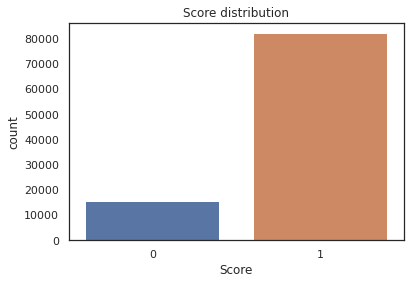

In [34]:
#data points for each class
print(data['Score'].value_counts())
print("*"*50)

#Count plot for Score
sns.countplot('Score',data = data)
plt.title("Score distribution")

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
#set of stopwords
import re
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')                      


#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

In [37]:
data['CleanedText'] = data['Text'].apply(final_sentence)
print(data.shape)
data.head()


(97889, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted peanuts a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great wide assortment yummy Delive...


In [38]:
def Text_Into_Vector(model,data):
    model_vect = model(ngram_range=(1,2)) #in scikit-learn
    final_array = model_vect.fit_transform(data.values)

    print("the type of count vectorizer ",type(final_array))
    print("the shape of out text BOW vectorizer ",final_array.get_shape())
    print("the number of unique words including both unigrams and bigrams ", final_array.get_shape()[1])
    
    return model_vect, final_array

In [39]:
#split data into train, cross validate and test 
from sklearn.model_selection import train_test_split

def Split_data(x_vec, y_vec):
    X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=.33, random_state=0)
    return X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train


In [40]:
#Normalize Data
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

def Normalization(train, cv, test):
    train=preprocessing.normalize(train)
    cv=preprocessing.normalize(cv)
    test=preprocessing.normalize(test)

    print("Train Data Size ",train.get_shape())
    print("CV Data Size: ",cv.shape)
    print("Test Data Size: ",test.shape)
    
    return train, cv, test


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as pyplt

def Multinomial_NB(X_train,X_cv,Y_train,Y_cv):
    #############################################################################
    best_alpha=0
    max_roc_auc=-1
    pred_cv = []
    pred_train = []
    alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
    #############################################################################

    for i in alpha:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(X_train,Y_train)
        probs = mulbnb.predict_proba(X_cv)[:,1]     
        prob = mulbnb.predict_proba(X_train)[:,1]
        #############################################################################

        auc_score_cv = roc_auc_score(Y_cv,probs)            #auc roc for cv
        auc_score_train = roc_auc_score(Y_train,prob)       #auc roc for train
        #############################################################################

        print(i," ------> ",auc_score_cv)
        #############################################################################

        pred_cv.append(auc_score_cv)
        pred_train.append(auc_score_train)
        #############################################################################

        if(max_roc_auc<auc_score_cv):
            max_roc_auc=auc_score_cv
            best_alpha=i

    print("*"*100)
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {max_roc_auc}")
    print("*"*100)
    #############################################################################

    sns.set_style("darkgrid")
    plt.xscale('log')
    plt.plot(alpha, pred_cv,'r-', label = 'CV Data')
    plt.plot(alpha,pred_train,'g-', label ='Train Data')
    plt.legend(loc='upper right')
    plt.title(r'Auc Score v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("roc_auc",fontsize=12)
    plt.show()
    print("*"*100)
    #############################################################################

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_cv,probs)
    # plot no skill
    pyplt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplt.plot(fpr, tpr, marker='.')
    pyplt.title("Line Plot of ROC Curve on Train Data")
    pyplt.ylabel('True Positive Rate')
    pyplt.xlabel('False Positive Rate')
    pyplt.show()
    print("*"*100)
    
    #############################################################################
    return best_alpha

In [43]:
!pip install scikit-plot

In [44]:
import scikitplot.metrics as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
    
    #############################################################################
    bnb = MultinomialNB(alpha = best_alpha, fit_prior=True, class_prior=None)
    bnb.fit(X_train,Y_train)
    probs = bnb.predict_proba(X_test)[:,1]            # keep probabilities for the positive outcome only

    #############################################################################
    roc_auc = roc_auc_score(Y_test,probs)
    print("AUC Score",roc_auc)
    print("*"*70)
    #############################################################################'

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("Line Plot of ROC Curve on Test Data")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

    #############################################################################
    prediction=bnb.predict(X_test)
    skplt.plot_confusion_matrix(Y_test,prediction)
    #############################################################################

    print("macro f1 score for data :",metrics.f1_score(Y_test, prediction, average = 'macro'))
    print("micro f1 score for data:",metrics.f1_score(Y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("*"*70)
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))
    print("*"*70)
    
    return bnb,roc_auc

    #############################################################################


In [45]:
def Important_features(model, classifier):
    neg = classifier.feature_log_prob_[0].argsort()
    pos = classifier.feature_log_prob_[1].argsort()
    top_pos_words = np.take(model.get_feature_names(),pos)
    top_neg_words = np.take(model.get_feature_names(),neg)
    imp_df = pd.DataFrame(columns = ['Pos_Words','Pos_Importance','Neg_Words','Neg_Importance'])
    imp_df['Pos_Words'] = top_pos_words[::-1]
    imp_df['Pos_Importance'] = np.take(classifier.feature_log_prob_[1],pos)[::-1]
    imp_df['Neg_Words'] = top_neg_words[::-1]
    imp_df['Neg_Importance'] = np.take(classifier.feature_log_prob_[0],neg)[::-1]
    return imp_df

In [46]:

def Individual_Prediction(model, classifier, review):
    review = final_sentence(review)
    review_vec = model.transform([review])
    review_vec = preprocessing.normalize(review_vec)
    pred = classifier.predict(review_vec)

    return "positive review" if pred[0] == 1 else "negative review"

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

BOW, X = Text_Into_Vector(CountVectorizer,data['CleanedText'])


the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (97889, 1346419)
the number of unique words including both unigrams and bigrams  1346419


In [48]:

BOW.get_feature_names()[:20]

['aaaa',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaah',
 'aaaaah awake',
 'aaaand',
 'aaaand theyre',
 'aaah',
 'aaah inhale',
 'aaah nice',
 'aaahs',
 'aaahs taste',
 'aadp',
 'aaf',
 'aaf hair',
 'aafco',
 'aafco aafco',
 'aafco also',
 'aafco dog',
 'aafco maximum']

In [49]:
BOW.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [51]:
#split data into train, cross validate and test 

X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

In [52]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (32304, 1346419) (32304,)
X_tr, Y_tr (43941, 1346419) (43941,)
X_cv, Y_cv (21644, 1346419) (21644,)
X_Train, Y_Train (65585, 1346419) (65585,)


In [53]:
# Normalization

X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)


Train Data Size  (43941, 1346419)
CV Data Size:  (21644, 1346419)
Test Data Size:  (32304, 1346419)


10000  ------>  0.6064458317635021
5000  ------>  0.607689319677163
1000  ------>  0.6147565638680769
500  ------>  0.6204807665970534
100  ------>  0.6396152395864438
50  ------>  0.6498429852992751
10  ------>  0.6786928805399256
5  ------>  0.6939374557122084
1  ------>  0.7439911042763427
0.5  ------>  0.77835401800631
0.1  ------>  0.8816436028754335
0.05  ------>  0.9003118349924408
0.01  ------>  0.8914069705954719
0.005  ------>  0.8881345857883285
0.001  ------>  0.8828207691182558
0.0005  ------>  0.8795474844455474
0.0001  ------>  0.869560618536015
5e-05  ------>  0.8647748571877828
1e-05  ------>  0.8536202025818407
****************************************************************************************************

 Best alpha Value 0.05 with highest roc_auc Score is 0.9003118349924408
****************************************************************************************************


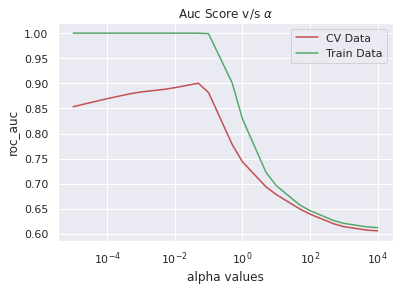

****************************************************************************************************


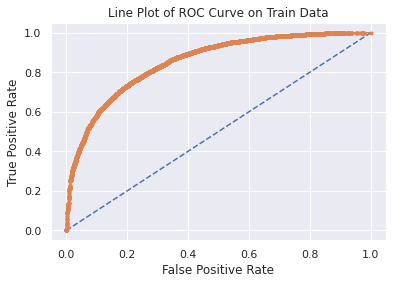

****************************************************************************************************


In [54]:

#training NB 

best_alpha_bow = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.906907010426631
**********************************************************************


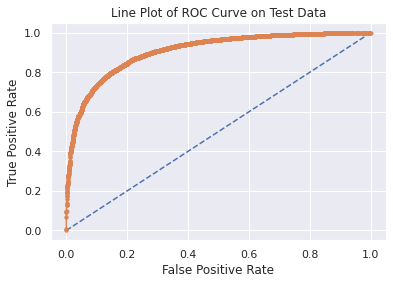

macro f1 score for data : 0.5997070646860918
micro f1 score for data: 0.861812778603269
hamming loss for data: 0.13818722139673106
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.88      0.16      0.28      5196
           1       0.86      1.00      0.92     27108

    accuracy                           0.86     32304
   macro avg       0.87      0.58      0.60     32304
weighted avg       0.86      0.86      0.82     32304

**********************************************************************


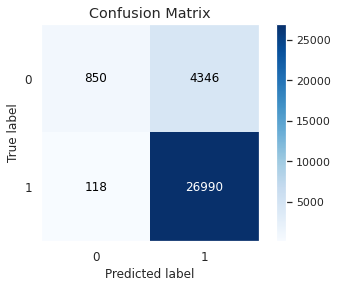

In [55]:
# Testing NB Model

NB_bow, roc_auc_bow = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_bow)

In [56]:
#Top features using NB and BOW

Important_features(BOW, NB_bow)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,like,-5.227683,like,-5.645276
1,great,-5.335689,taste,-6.104405
2,good,-5.434206,would,-6.151119
3,love,-5.540849,product,-6.192819
4,one,-5.679367,one,-6.324983
...,...,...,...,...
1346414,loose chai,-15.658664,pick chose,-14.669188
1346415,loose ceylon,-15.658664,pick clean,-14.669188
1346416,loose cereal,-15.658664,pick cleaned,-14.669188
1346417,loose cellophane,-15.658664,pick clif,-14.669188


In [57]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

TfIdf, X = Text_Into_Vector(TfidfVectorizer,data['CleanedText'])


the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (97889, 1346419)
the number of unique words including both unigrams and bigrams  1346419


In [58]:
TfIdf.get_feature_names()[:20]

['aaaa',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaah',
 'aaaaah awake',
 'aaaand',
 'aaaand theyre',
 'aaah',
 'aaah inhale',
 'aaah nice',
 'aaahs',
 'aaahs taste',
 'aadp',
 'aaf',
 'aaf hair',
 'aafco',
 'aafco aafco',
 'aafco also',
 'aafco dog',
 'aafco maximum']

In [59]:
TfIdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [60]:
#split data into train, cross validate and test 

X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])


In [61]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (32304, 1346419) (32304,)
X_tr, Y_tr (43941, 1346419) (43941,)
X_cv, Y_cv (21644, 1346419) (21644,)
X_Train, Y_Train (65585, 1346419) (65585,)


In [62]:
# Normalize Data

X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (43941, 1346419)
CV Data Size:  (21644, 1346419)
Test Data Size:  (32304, 1346419)


10000  ------>  0.632179918805288
5000  ------>  0.632421556390115
1000  ------>  0.6342560033860205
500  ------>  0.6363680983764609
100  ------>  0.6482745985553684
50  ------>  0.6575633898062123
10  ------>  0.6903762929943333
5  ------>  0.7093069069655041
1  ------>  0.7692012485397905
0.5  ------>  0.8054964104441555
0.1  ------>  0.8790771073489889
0.05  ------>  0.8785101920431518
0.01  ------>  0.8608690222779087
0.005  ------>  0.8582540918821153
0.001  ------>  0.8535879258248709
0.0005  ------>  0.8504012019046523
0.0001  ------>  0.8408461688499853
5e-05  ------>  0.8363962783770436
1e-05  ------>  0.826329040264169
****************************************************************************************************

 Best alpha Value 0.1 with highest roc_auc Score is 0.8790771073489889
****************************************************************************************************


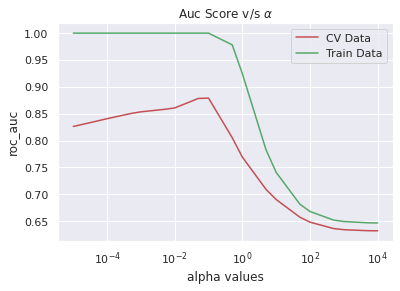

****************************************************************************************************


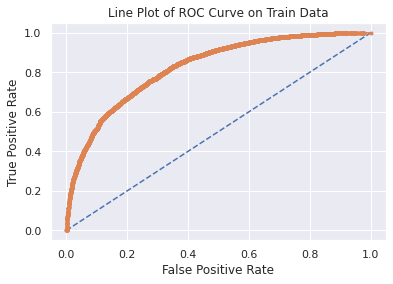

****************************************************************************************************


In [63]:
#Training NB model

best_alpha_idf = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.8861822440514792
**********************************************************************


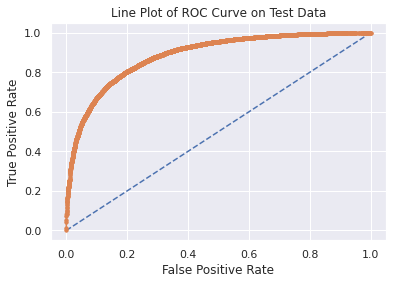

macro f1 score for data : 0.5498436925900666
micro f1 score for data: 0.8532999009410599
hamming loss for data: 0.14670009905894008
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.89      0.10      0.18      5196
           1       0.85      1.00      0.92     27108

    accuracy                           0.85     32304
   macro avg       0.87      0.55      0.55     32304
weighted avg       0.86      0.85      0.80     32304

**********************************************************************


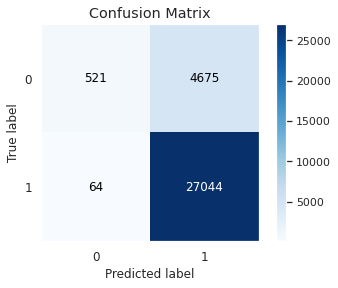

In [64]:
# Testing NB Model

NB_tfidf, roc_auc_idf = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_idf)

In [65]:
# Top features using NB and tfidf

Important_features(TfIdf, NB_tfidf)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,great,-6.602159,like,-7.339618
1,like,-6.634824,taste,-7.597570
2,good,-6.719955,would,-7.628189
3,love,-6.760229,product,-7.645504
4,coffee,-6.884525,one,-7.891669
...,...,...,...,...
1346414,trying tasted,-15.135126,pick chose,-14.421176
1346415,love someone,-15.135126,pick clean,-14.421176
1346416,love somehow,-15.135126,pick cleaned,-14.421176
1346417,love solved,-15.135126,pick clif,-14.421176


In [66]:

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperameter(alpha)","Test Auc Score"]

####################################################################################
x.add_row(["BoW","MultinomialNB",best_alpha_bow, roc_auc_bow])
x.add_row(["Tf-Idf","MultinomialNB",best_alpha_idf, roc_auc_idf])

####################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
####################################################################################
printmd('****Final Conclusion for MultiNomialNB Model:****')
print(x)

****Final Conclusion for MultiNomialNB Model:****

+------------+---------------+--------------------+--------------------+
| Vectorizer |     Model     | Hyperameter(alpha) |   Test Auc Score   |
+------------+---------------+--------------------+--------------------+
|    BoW     | MultinomialNB |        0.05        | 0.906907010426631  |
|   Tf-Idf   | MultinomialNB |        0.1         | 0.8861822440514792 |
+------------+---------------+--------------------+--------------------+


In [67]:

# Individual prediction
review = """Great, healthier alternative to the usual bhujia we Indians are used to having along with our tea or our beer.
            Much less salt than traditional tea snacks as well. I love the variety of texture as well with the very 
            crunchy peas to soft cheese bits, the sesame seed coated snack to good old roasted peanuts. It is pretty 
            expensive though, at 600rs at a kilo perhaps the most expensive tea snack Ive ever had."""

print("Prediction using BOW:", Individual_Prediction(BOW, NB_bow, review))
print("Prediction using TF-Idf:", Individual_Prediction(TfIdf, NB_tfidf, review))

Prediction using BOW: positive review
Prediction using TF-Idf: positive review
